In [93]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_set = pd.read_csv('adult.data', header = None)

In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [4]:
train_set.columns = col_labels

In [5]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#train_set.dtypes

In [7]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

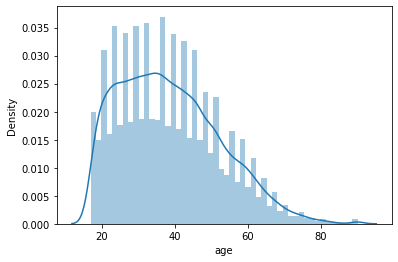

In [8]:
sns.distplot(train_set.age)

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


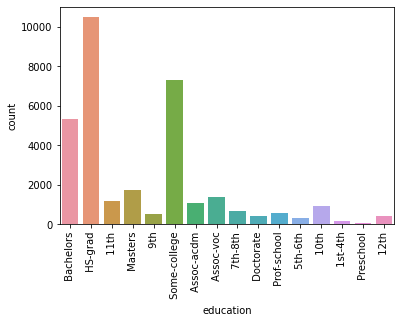

In [9]:
sns.countplot(train_set.education)
#sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

In [10]:
train_set['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [11]:
train_set['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


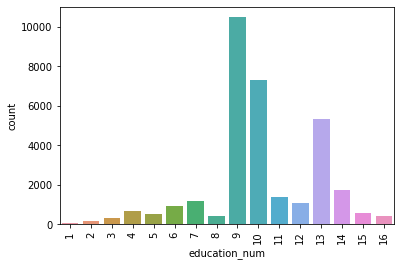

In [12]:
sns.countplot(train_set.education_num)
#sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


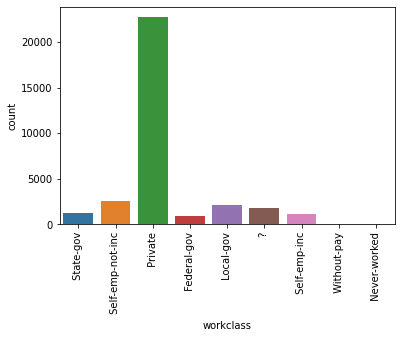

In [13]:
sns.countplot(train_set.workclass)
#sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


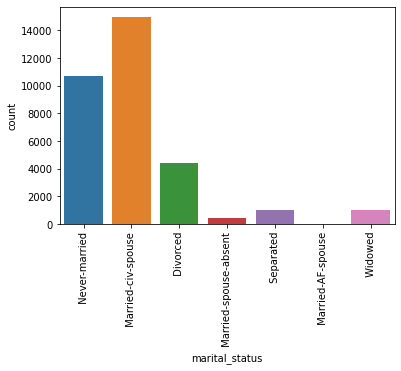

In [14]:
sns.countplot(train_set.marital_status)
#sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


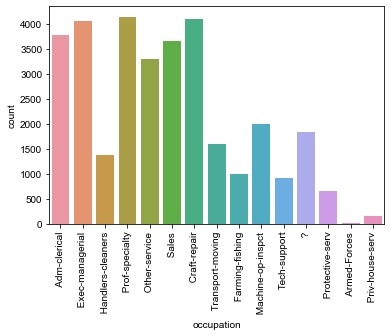

In [15]:
sns.countplot(train_set.occupation)
sns.set(rc = {'figure.figsize':(10,5)})
plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


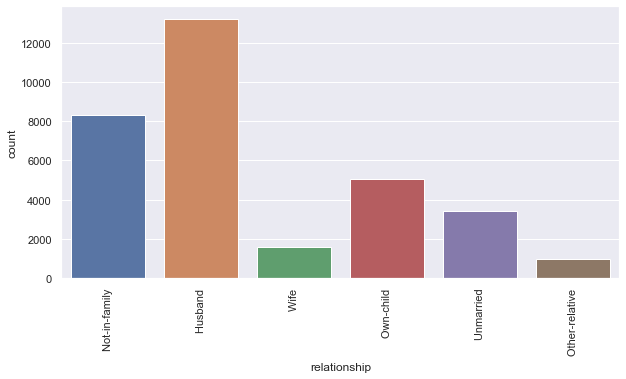

In [16]:
sns.countplot(train_set.relationship)
sns.set(rc = {'figure.figsize':(10,5)})
plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


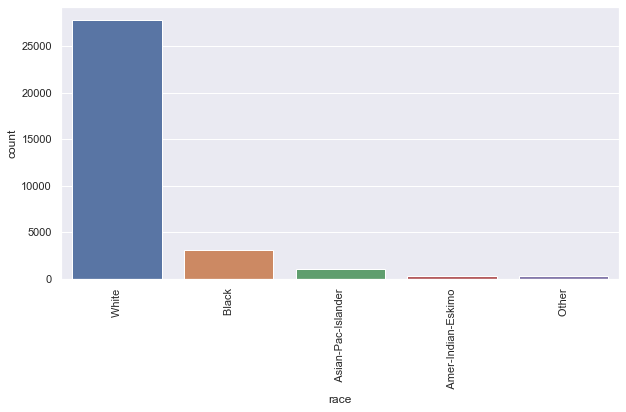

In [17]:
sns.countplot(train_set.race)
#sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


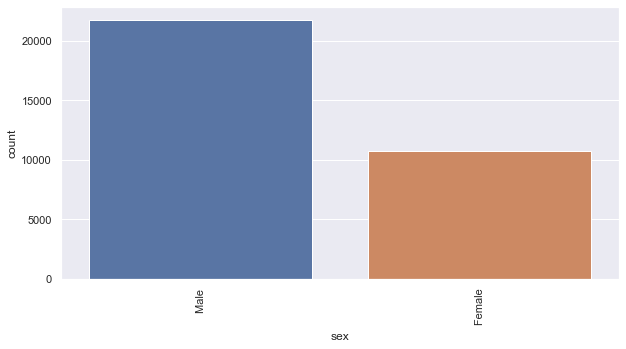

In [18]:
sns.countplot(train_set.sex)
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


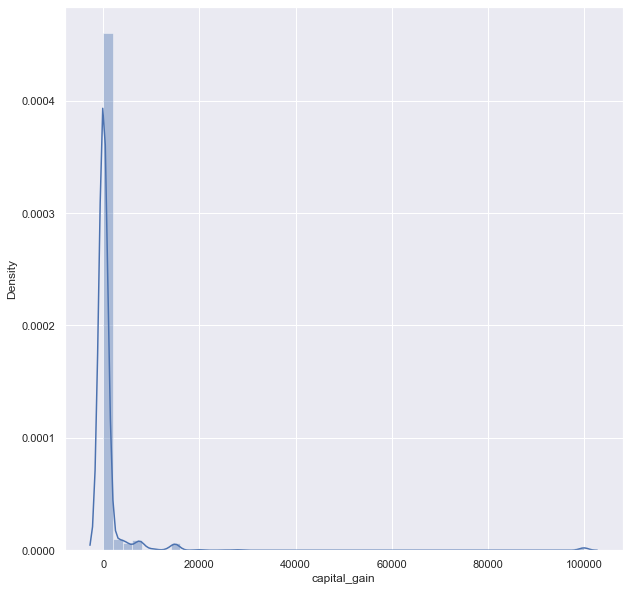

In [19]:
sns.distplot(train_set.capital_gain)
#sns.set(rc = {'figure.figsize':(10,5)})

#sns.countplot(x = 'capital_gain', data = train_set)
#plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


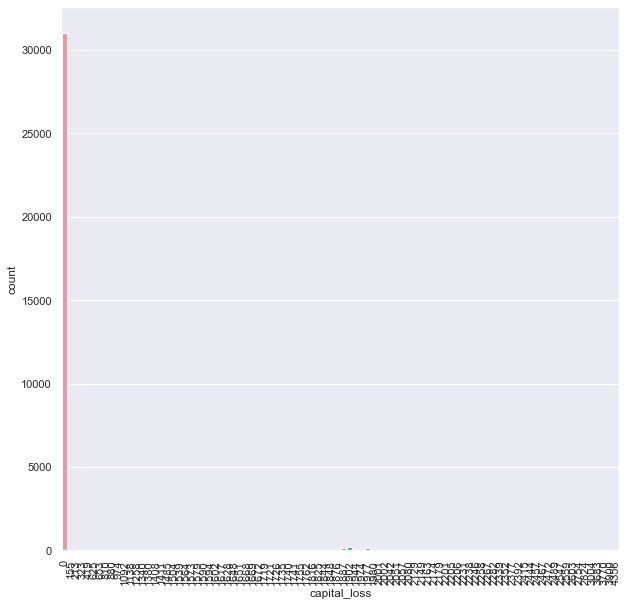

In [20]:
sns.countplot(train_set.capital_loss)
#sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

C:\Users\Puran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


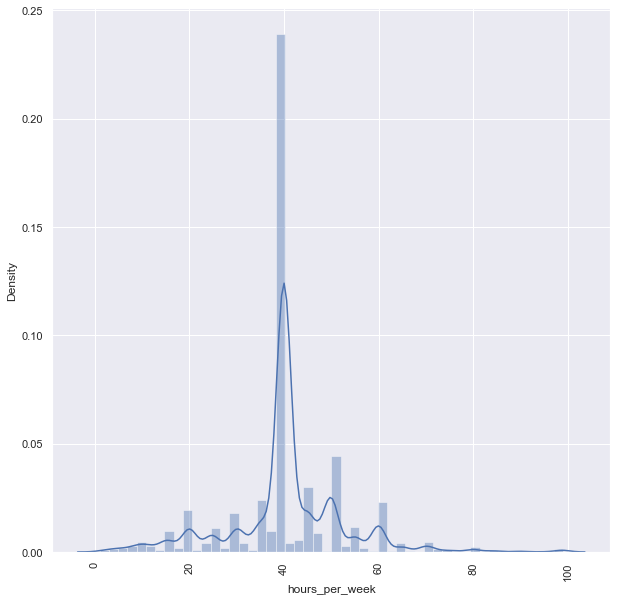

In [21]:
sns.distplot(train_set.hours_per_week)
#sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

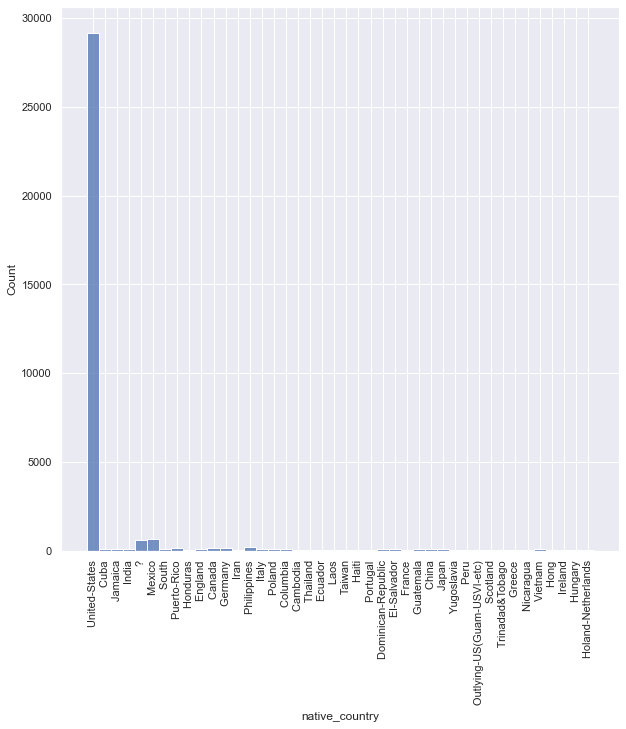

In [22]:
sns.histplot(train_set.native_country)
#sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(ticks = None, rotation = 90)
plt.show()

<AxesSubplot:xlabel='race', ylabel='count'>

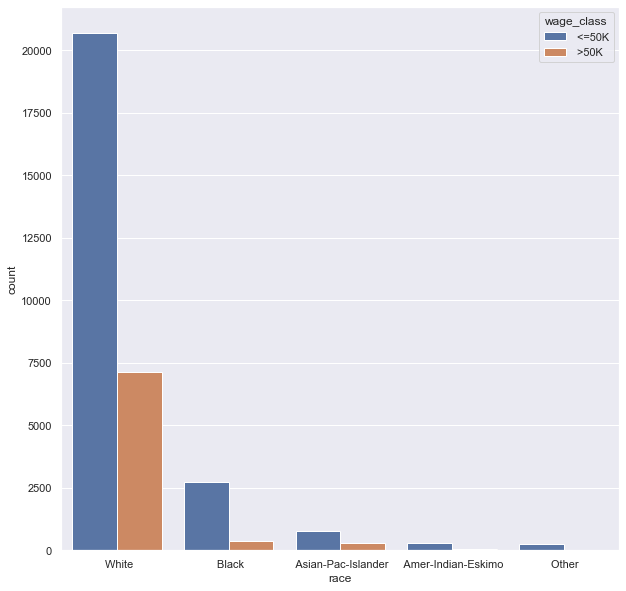

In [23]:
sns.countplot(x = 'race', hue = 'wage_class', data = train_set)

<AxesSubplot:xlabel='sex', ylabel='count'>

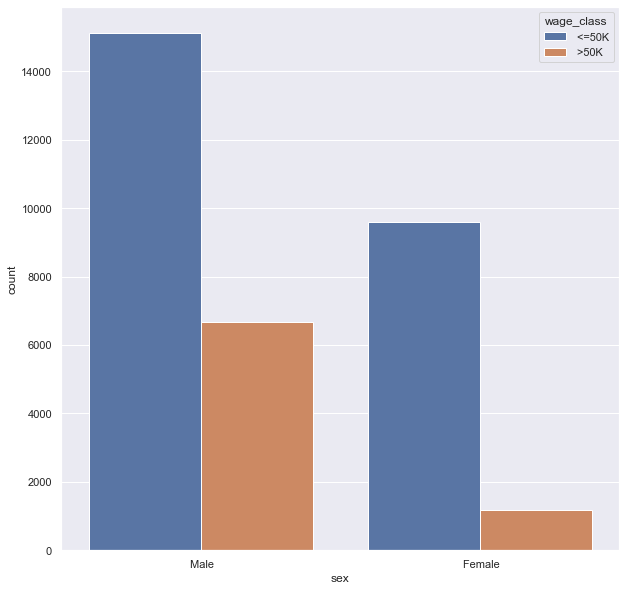

In [24]:
sns.countplot(x = 'sex', hue = 'wage_class', data = train_set)

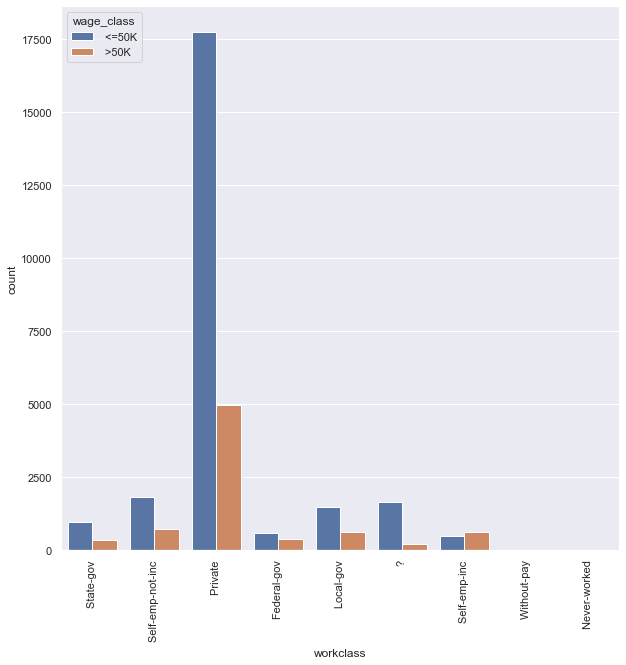

In [25]:
sns.countplot(x = 'workclass', hue = 'wage_class', data = train_set)
plt.xticks(rotation = 90)
plt.show()

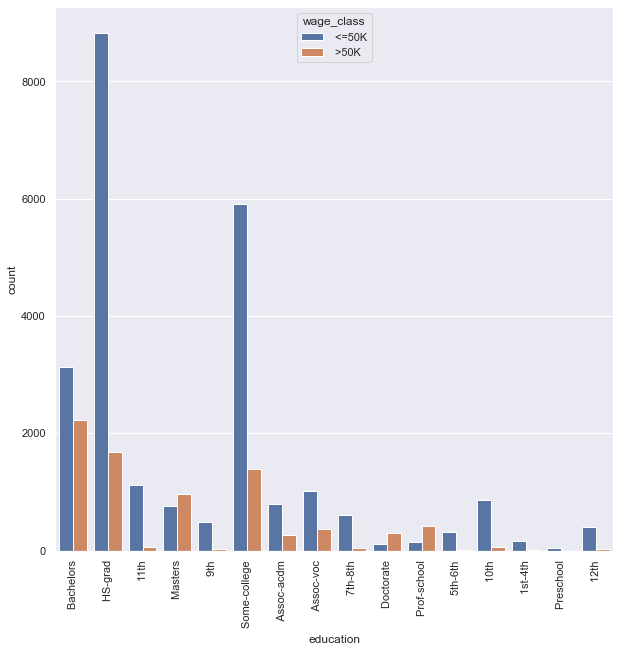

In [26]:
sns.countplot(x = 'education', hue = 'wage_class', data = train_set)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='relationship', ylabel='count'>

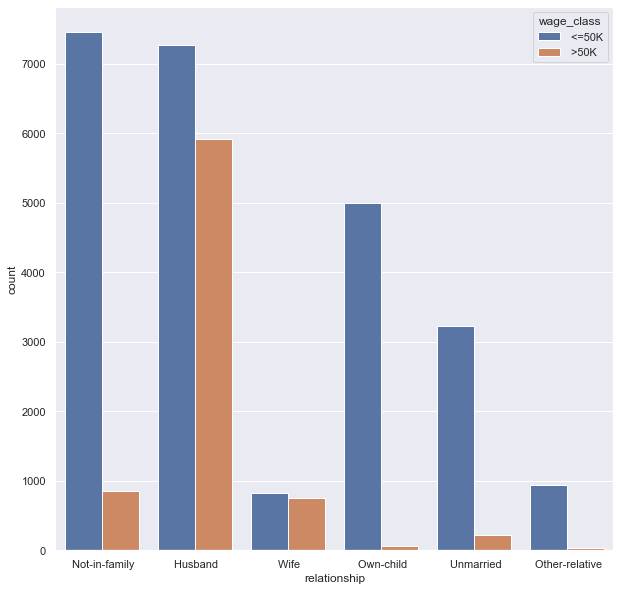

In [27]:
sns.countplot(x = 'relationship', hue = 'wage_class', data = train_set)

<AxesSubplot:>

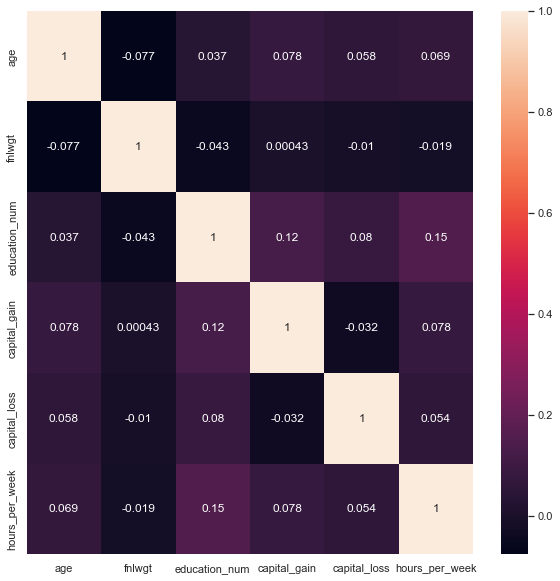

In [28]:
sns.heatmap(train_set.corr(), annot = True)

In [29]:
l22 = []
for feature in col_labels:
    l11 = []
    for i in train_set[feature].value_counts().index:
        l11.append(str(i))
    for j in l11:
        if '?' in j:
            l22.append(feature)
l22

['workclass', 'occupation', 'native_country']

In [30]:
train_set['workclass'].mode()

0     Private
dtype: object

In [31]:
train_set['occupation'].mode()

0     Prof-specialty
dtype: object

In [32]:
train_set['native_country'].mode()

0     United-States
dtype: object

In [33]:
# replacing '?' with most frequent occuring values
train_set['workclass'] = train_set['workclass'].str.replace('?', 'Private')
train_set['occupation'] = train_set['occupation'].str.replace('?', 'Prof-specialty')
train_set['native_country'] = train_set['native_country'].str.replace('?', 'native_country')

<ipython-input-33-a54fc395c8f4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_set['workclass'] = train_set['workclass'].str.replace('?', 'Private')
<ipython-input-33-a54fc395c8f4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_set['occupation'] = train_set['occupation'].str.replace('?', 'Prof-specialty')
<ipython-input-33-a54fc395c8f4>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_set['native_country'] = train_set['native_country'].str.replace('?', 'native_country')


In [34]:
train_set['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

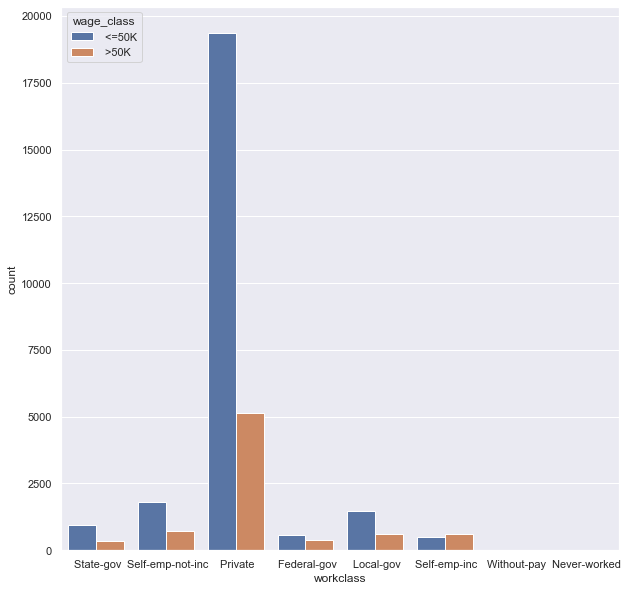

In [35]:
sns.countplot(x = 'workclass', hue = 'wage_class', data = train_set)

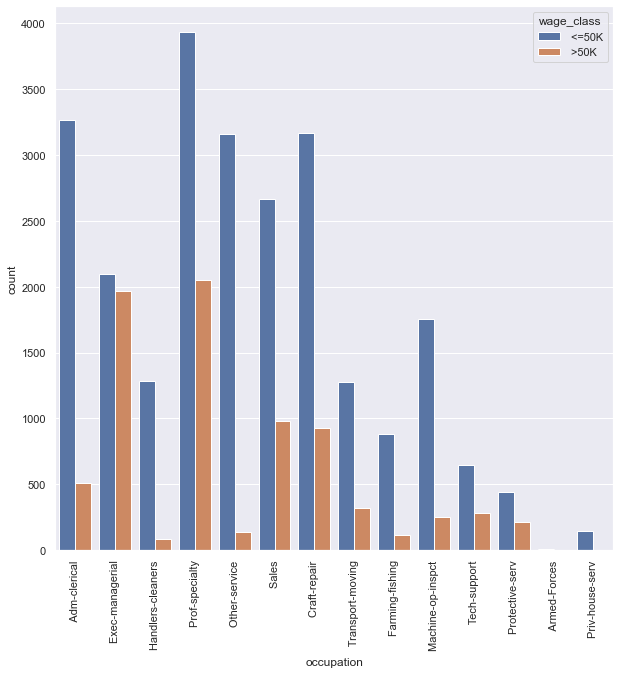

In [36]:
sns.countplot(x = 'occupation', hue = 'wage_class', data = train_set)
plt.xticks(rotation = 90)
plt.show()

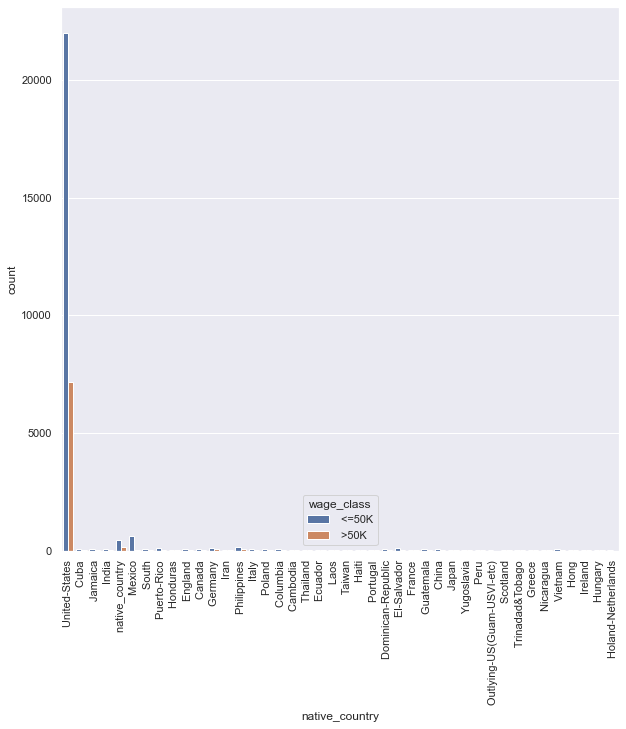

In [37]:
sns.countplot(x = 'native_country', hue = 'wage_class', data = train_set)
plt.xticks(rotation = 90)
plt.show()

In [38]:
train_set['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [39]:
# privte+self-emp-not-inc
# local-gov+state
#w/o pay+never
train_set['workclass'] = train_set['workclass'].str.replace('Self-emp-not-inc', 'Private')
train_set['workclass'] = train_set['workclass'].str.replace('Local-gov', 'State-gov')
train_set['workclass'] = train_set['workclass'].str.replace('Without-pay', 'Never-worked')

In [40]:
train_set['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [41]:
train_set['education'] = train_set['education'].str.replace('Some-college', 'HS-grad')
train_set['education'] = train_set['education'].str.replace('Doctorate', 'Prof-school')
train_set['education'] = train_set['education'].str.replace('Assoc-voc', 'Assoc-acdm')
to_replace = {'11th': 'school', '10th': 'school', '7th-8th': 'school','9th': 'school','12th': 'school','5th-6th': 'school','1st-4th': 'school','Preschool': 'school' }
train_set['education'] = train_set['education'].str.replace('11th', 'school')
train_set['education'] = train_set['education'].str.replace('10th', 'school')
train_set['education'] = train_set['education'].str.replace('Preschool', 'school')
train_set['education'] = train_set['education'].str.replace('7th-8th', 'school')
train_set['education'] = train_set['education'].str.replace('9th', 'school')
train_set['education'] = train_set['education'].str.replace('12th', 'school')
train_set['education'] = train_set['education'].str.replace('5th-6th', 'school')
train_set['education'] = train_set['education'].str.replace('1st-4th', 'school')

In [44]:
train_set['marital_status'].value_counts()

 Married-civ-spouse    14976
 Never-married         10683
 noSpouse               6902
Name: marital_status, dtype: int64

In [43]:
train_set['marital_status'] = train_set['marital_status'].str.replace('Divorced', 'noSpouse')
train_set['marital_status'] = train_set['marital_status'].str.replace('Separated', 'noSpouse')
train_set['marital_status'] = train_set['marital_status'].str.replace('Widowed', 'noSpouse')
train_set['marital_status'] = train_set['marital_status'].str.replace('Married-spouse-absent', 'noSpouse')
train_set['marital_status'] = train_set['marital_status'].str.replace('Married-AF-spouse', 'noSpouse')

In [47]:
train_set['relationship'].value_counts()

 other      17800
 Husband    13193
 Wife        1568
Name: relationship, dtype: int64

In [46]:
train_set['relationship'] = train_set['relationship'].str.replace('Not-in-family', 'other')
train_set['relationship'] = train_set['relationship'].str.replace('Own-child', 'other')
train_set['relationship'] = train_set['relationship'].str.replace('Unmarried', 'other')
train_set['relationship'] = train_set['relationship'].str.replace('Other-relative', 'other')

In [49]:
train_set['race'] = train_set['race'].str.replace('Amer-Indian-Eskimo', 'Other')

In [50]:
train_set['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Other                   582
Name: race, dtype: int64

In [51]:
num_features = [feature for feature in train_set.columns if train_set[feature].dtypes != 'O']
num_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

<AxesSubplot:>

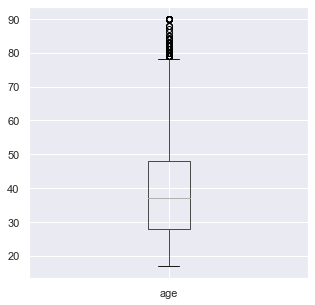

In [52]:
train_set.boxplot(column = 'age', figsize = (5,5))

Text(0, 0.5, 'No. of people')

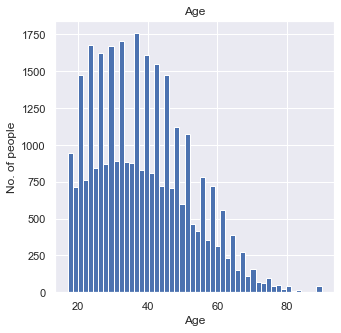

In [54]:
figure = train_set.age.hist(bins = 50, figsize = (5,5))
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of people')

<AxesSubplot:>

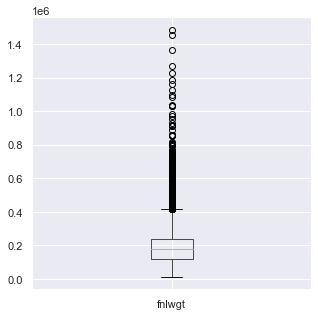

In [55]:
train_set.boxplot(column = 'fnlwgt', figsize = (5,5))

Text(0, 0.5, 'No. of people')

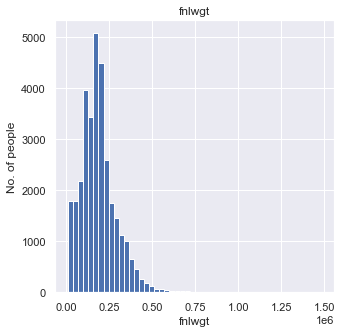

In [56]:
figure = train_set.fnlwgt.hist(bins = 50, figsize = (5,5))
figure.set_title('fnlwgt')
figure.set_xlabel('fnlwgt')
figure.set_ylabel('No. of people')

In [57]:
lower_b = train_set['fnlwgt'].mean() - 3 * train_set['fnlwgt'].std()
upper_b = train_set['fnlwgt'].mean() + 3 * train_set['fnlwgt'].std()
print(lower_b), print(upper_b), print(train_set['fnlwgt'].mean())

-126871.56657898199
506428.29960315203
189778.36651208502


(None, None, None)

<AxesSubplot:>

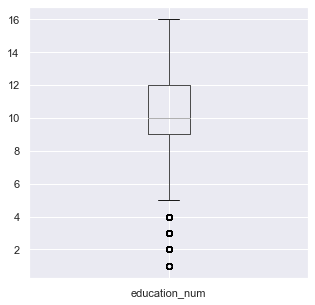

In [58]:
train_set.boxplot(column = 'education_num', figsize = (5,5))

Text(0, 0.5, 'No. of people')

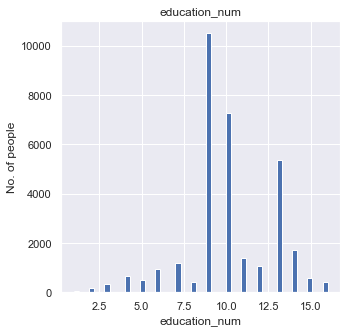

In [59]:
figure = train_set.education_num.hist(bins = 50, figsize = (5,5))
figure.set_title('education_num')
figure.set_xlabel('education_num')
figure.set_ylabel('No. of people')

<AxesSubplot:>

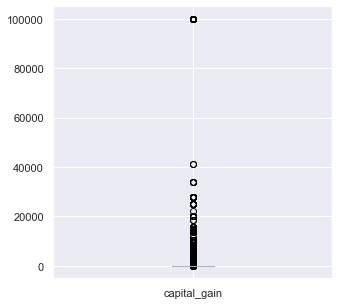

In [60]:
train_set.boxplot(column = 'capital_gain', figsize = (5,5))

Text(0, 0.5, 'No. of people')

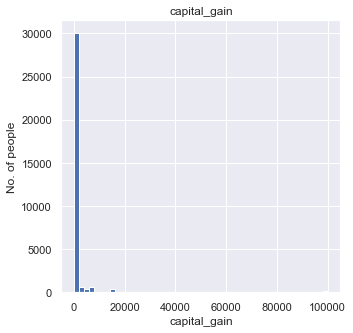

In [61]:
figure = train_set.capital_gain.hist(bins = 50, figsize = (5,5))
figure.set_title('capital_gain')
figure.set_xlabel('capital_gain')
figure.set_ylabel('No. of people')

<AxesSubplot:>

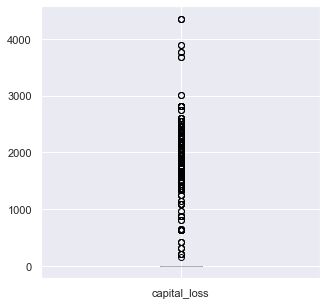

In [62]:
train_set.boxplot(column = 'capital_loss', figsize = (5,5))

Text(0, 0.5, 'No. of people')

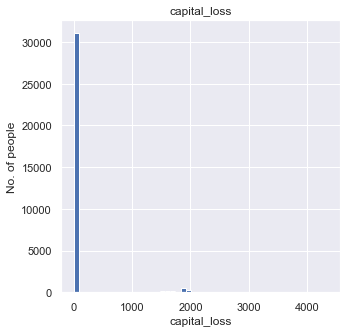

In [63]:
figure = train_set.capital_loss.hist(bins = 50, figsize = (5,5))
figure.set_title('capital_loss')
figure.set_xlabel('capital_loss')
figure.set_ylabel('No. of people')

<AxesSubplot:>

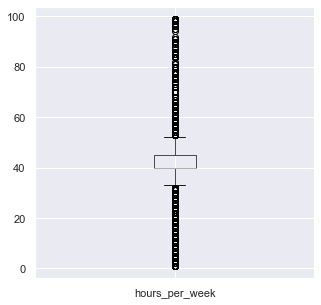

In [64]:
train_set.boxplot(column = 'hours_per_week', figsize = (5,5))

Text(0, 0.5, 'No. of passenger')

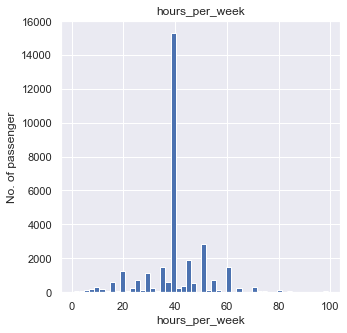

In [65]:
figure = train_set.hours_per_week.hist(bins = 50, figsize = (5,5))
figure.set_title('hours_per_week')
figure.set_xlabel('hours_per_week')
figure.set_ylabel('No. of passenger')

In [66]:
train_set.skew()

<ipython-input-66-df6ea42c34ee>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_set.skew()


age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64

In [67]:
#for feature in ['fnlwgt', 'capital_gain', 'capital_loss']:
train_set['fnlwgt'] = np.sqrt(train_set['fnlwgt'])

In [68]:
train_set['capital_gain'] = np.cbrt(train_set['fnlwgt'])

In [69]:
train_set['capital_loss'] = np.cbrt(train_set['capital_loss'])

In [70]:
train_set.skew()

<ipython-input-70-df6ea42c34ee>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_set.skew()


age               0.558743
fnlwgt            0.189115
education_num    -0.311676
capital_gain     -0.506136
capital_loss      4.337076
hours_per_week    0.227643
dtype: float64

In [71]:
#label encoding

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
label_encode = LabelEncoder()

In [74]:
col_labels

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'wage_class']

In [75]:
train_set['workclass'] = label_encode.fit_transform(train_set['workclass'])
train_set['education'] = label_encode.fit_transform(train_set['education'])
train_set['marital_status'] = label_encode.fit_transform(train_set['marital_status'])
train_set['occupation'] = label_encode.fit_transform(train_set['occupation'])
train_set['relationship'] = label_encode.fit_transform(train_set['relationship'])
train_set['race'] = label_encode.fit_transform(train_set['race'])
train_set['sex'] = label_encode.fit_transform(train_set['sex'])
train_set['native_country'] = label_encode.fit_transform(train_set['native_country'])

In [76]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,4,278.416954,1,13,1,0,2,3,1,6.529780,0.0,40,38,<=50K
1,50,2,288.636450,1,13,0,3,0,3,1,6.608716,0.0,13,38,<=50K
2,38,2,464.377002,2,9,2,5,2,3,1,7.743849,0.0,40,38,<=50K
3,53,2,484.480134,5,7,0,5,0,1,1,7.854020,0.0,40,38,<=50K
4,28,2,581.729318,1,13,0,9,1,1,0,8.347831,0.0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,507.249446,0,12,0,12,1,3,0,7.975181,0.0,38,38,<=50K
32557,40,2,392.904569,2,9,0,6,0,3,1,7.324237,0.0,40,38,>50K
32558,58,2,389.756334,2,9,2,0,2,3,0,7.304622,0.0,40,38,<=50K
32559,22,2,448.876375,2,9,1,0,2,3,1,7.656711,0.0,20,38,<=50K


In [77]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
X = train_set.drop('wage_class', axis = 1)
y = train_set['wage_class']

In [106]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,4,278.416954,1,13,1,0,2,3,1,6.529780,0.0,40,38
1,50,2,288.636450,1,13,0,3,0,3,1,6.608716,0.0,13,38
2,38,2,464.377002,2,9,2,5,2,3,1,7.743849,0.0,40,38
3,53,2,484.480134,5,7,0,5,0,1,1,7.854020,0.0,40,38
4,28,2,581.729318,1,13,0,9,1,1,0,8.347831,0.0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,507.249446,0,12,0,12,1,3,0,7.975181,0.0,38,38
32557,40,2,392.904569,2,9,0,6,0,3,1,7.324237,0.0,40,38
32558,58,2,389.756334,2,9,2,0,2,3,0,7.304622,0.0,40,38
32559,22,2,448.876375,2,9,1,0,2,3,1,7.656711,0.0,20,38


In [80]:
data_x = scaler.fit_transform(X)
x = pd.DataFrame(data_x, columns = X.columns)

In [107]:
#data_x

In [81]:
x

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.030671,2.482011,-1.173869,-0.892681,1.134739,0.317378,-1.545256,0.889363,0.395868,0.703071,-1.175437,-0.220555,-0.035429,0.251378
1,0.837109,-0.249900,-1.088463,-0.892681,1.134739,-0.962549,-0.790092,-1.182508,0.395868,0.703071,-1.069878,-0.220555,-2.222153,0.251378
2,-0.042642,-0.249900,0.380227,-0.142924,-0.420060,1.597304,-0.286649,0.889363,0.395868,0.703071,0.448126,-0.220555,-0.035429,0.251378
3,1.057047,-0.249900,0.548231,2.106347,-1.197459,-0.962549,-0.286649,-1.182508,-2.195842,0.703071,0.595455,-0.220555,-0.035429,0.251378
4,-0.775768,-0.249900,1.360957,-0.892681,1.134739,-0.962549,0.720237,-0.146573,-2.195842,-1.422331,1.255824,-0.220555,-0.035429,-5.337971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,-0.249900,0.738518,-1.642437,0.746039,-0.962549,1.475401,-0.146573,0.395868,-1.422331,0.757483,-0.220555,-0.197409,0.251378
32557,0.103983,-0.249900,-0.217079,-0.142924,-0.420060,-0.962549,-0.034928,-1.182508,0.395868,0.703071,-0.113018,-0.220555,-0.035429,0.251378
32558,1.423610,-0.249900,-0.243389,-0.142924,-0.420060,1.597304,-1.545256,0.889363,0.395868,-1.422331,-0.139249,-0.220555,-0.035429,0.251378
32559,-1.215643,-0.249900,0.250685,-0.142924,-0.420060,0.317378,-1.545256,0.889363,0.395868,0.703071,0.331596,-0.220555,-1.655225,0.251378


In [94]:
xgb = XGBClassifier()

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [108]:
xgb.fit(x_train, y_train)
prediction = xgb.predict(x_test.values)
accuracy = accuracy_score(y_test, prediction)

C:\Users\Puran\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [110]:
accuracy

0.8430750332685024

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7428
        >50K       0.70      0.61      0.65      2341

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



In [111]:
# saving the model
filename = 'xgboost_model.pickle'
pickle.dump(xgb, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [112]:
filename_scaler = 'xgb_scaler_model.pickle'
pickle.dump(scaler, open(filename_scaler, 'wb'))
scaler_model = pickle.load(open(filename_scaler, 'rb'))

In [113]:
a = scaler_model.transform([[32,5,14,65,45,12,35,12,65,48,11,12,13,14]])
pred = loaded_model.predict(a)
print("This data belongs to:",pred[0])

This data belongs to:  <=50K


In [114]:
a = [[32,5,14,65,45,12,35,12,65,48,11,12,13,14]]
pred = loaded_model.predict(a)
pred[0]

ValueError: training data did not have the following fields: age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country

In [104]:
a

array([[ -0.48251753,   3.84796642,  -3.383641  ,  47.09175559,
         13.57312587,  14.39657331,   7.26499199,  11.2487187 ,
         80.73889517, 100.59697025,   4.80254366,   4.40781741,
         -2.22215312,  -3.69404475]])

In [92]:
pwd

'F:\\puran\\Data_science\\ML_Sudhanshu_Sir\\xgboost_assignment'